In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

#### Load the images

In [141]:
image_M = cv2.imread("Milkyway.png", 0)
image_C = cv2.imread("Cells.png", 0)

#### Find the max N of two images

In [142]:
heightM, widthM = image_M.shape
maxM = max(math.floor(math.sqrt(heightM)), math.floor(math.sqrt(widthM)))
heightC, widthC = image_C.shape
maxC = max(math.floor(math.sqrt(heightC)), math.floor(math.sqrt(widthC)))
maxM, maxC

(32, 33)

#### Define the min-filtered function

In [143]:
def min_filter(img, N, BG):
    height, width = img.shape
    p = N // 2
    new_image = np.zeros_like(img)
    image_padded = np.pad(img, ((p, p), (p, p)), 'constant', constant_values=(BG, BG))
    for i in range(p, height + p):
        for j in range(p, width + p):
            new_image[i - p][j - p] = np.min(image_padded[i - p:i + p + 1, j - p:j + p + 1])
    return new_image

#### Task1: Output of min-filtered : image A (with N = 3)

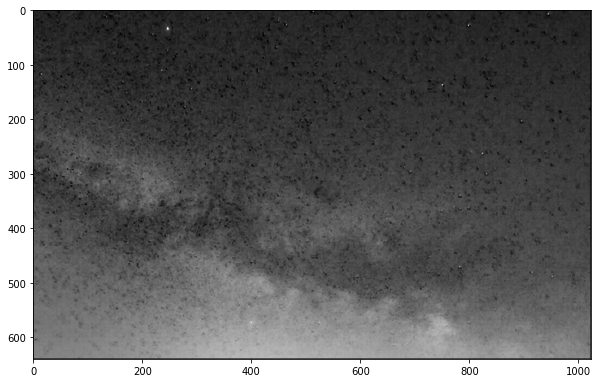

In [119]:
plt.figure(figsize=(10, 10))
imageA3 = min_filter(image_M, 3, 0)
plt.imshow(imageA3,"gray")

##### Task1: Output of min-filtered : image A (with N = 11,13)

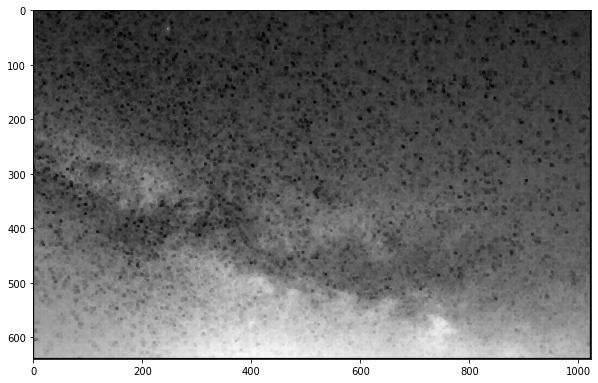

In [120]:
plt.figure(figsize=(10, 10))
imageA5 = min_filter(image_M, 5, 0)
plt.imshow(imageA5,"gray")

##### Task1: Output of min-filtered : image A (with N = 7)

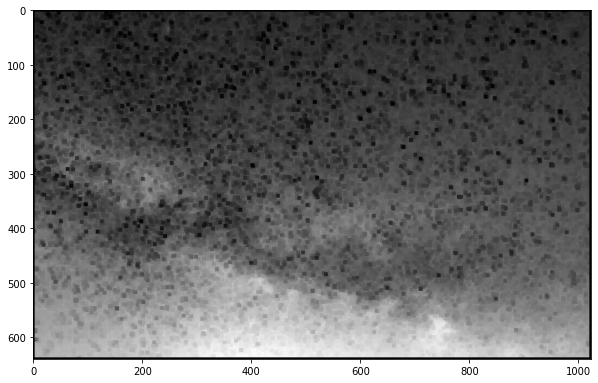

In [121]:
plt.figure(figsize=(10, 10))
imageA7 = min_filter(image_M, 7, 0)
plt.imshow(imageA7,"gray")

##### Task1: Output of min-filtered : image A (with N = 9)

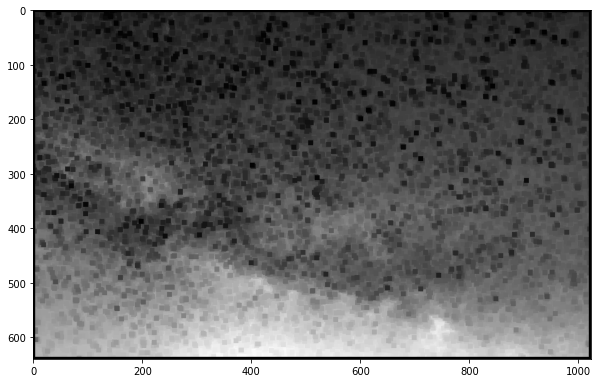

In [117]:
plt.figure(figsize=(10, 10))
imageA9 = min_filter(image_M, 9, 0)
plt.imshow(imageA9,"gray")

##### Task1: Output of min-filtered : image A (with N = 11)

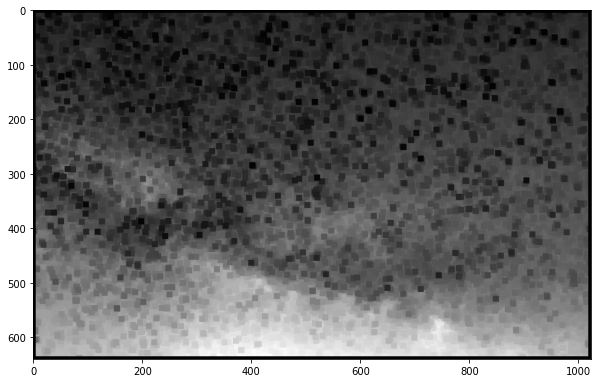

In [118]:
plt.figure(figsize=(10, 10))
imageA11 = min_filter(image_M, 11, 0)
plt.imshow(imageA11,"gray")

#### Define the max-filtered function

In [122]:
def max_filter(img, N, BG):
    height, width = img.shape
    p = N // 2
    new_image = np.zeros_like(img)
    image_padded = np.pad(img, ((p, p), (p, p)), 'constant', constant_values=(BG, BG))
    for i in range(p, height + p):
        for j in range(p, width + p):
            new_image[i - p][j - p] = np.max(image_padded[i - p:i + p + 1, j - p:j + p + 1])
    return new_image


##### Task1: Output of max-filtered : image B (with N = 9)

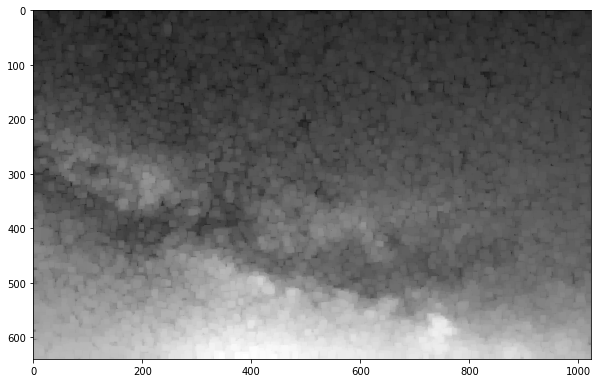

In [123]:
plt.figure(figsize=(10, 10))
imageB = max_filter(imageA9, 9, 0)
plt.imshow(imageB,"gray")

#### Define the find image process function

In [124]:
def img_process(img, M, N, BG):
    out_image = np.zeros_like(img)
    height, width = img.shape
    if M == 0:
        image1 = min_filter(img, N, BG)
        image2 = max_filter(image1, N, BG)
        for i in range(height):
            for j in range(width):
                out_image[i][j] = img[i][j].astype(np.int32) - image2[i][j].astype(np.int32)
            if out_image[i][j] > 255:
                out_image[i][j] = 255
            elif out_image[i][j] < 0:
                out_image[i][j] = 0
        out_image = out_image.astype(np.uint8)
    if M == 1:
        image1 = max_filter(img, N, BG)
        image2 = min_filter(image1, N, BG)
        for i in range(height):
            for j in range(width):
                out_image[i][j] = img[i][j].astype(np.int32) - image2[i][j].astype(np.int32) + 255
            if out_image[i][j] > 255:
                out_image[i][j] = 255
            elif out_image[i][j] < 0:
                out_image[i][j] = 0
        out_image = out_image.astype(np.uint8)

    return out_image


##### Task2: Output of Background Subtraction : image O (with N = 9)

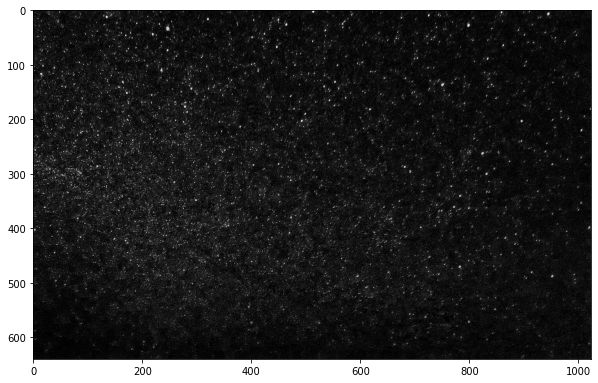

In [125]:
plt.figure(figsize=(10, 10))
imageO = img_process(image_M, 0, 9, 0)
plt.imshow(imageO,"gray")

##### Task2: Contrast stretch: image O (with N = 9), if the min pixel do not reach 0 or max pixel do not reach 255

In [127]:
def stretch(img):
    height, width = img.shape
    flat_gray = img.reshape((width * height,)).tolist()
    A = min(flat_gray)
    B = max(flat_gray)

    if A == 0 and B == 255:
        return img

    output = np.uint8(255 / (B - A) * (img - A) + 0.5)
    return output


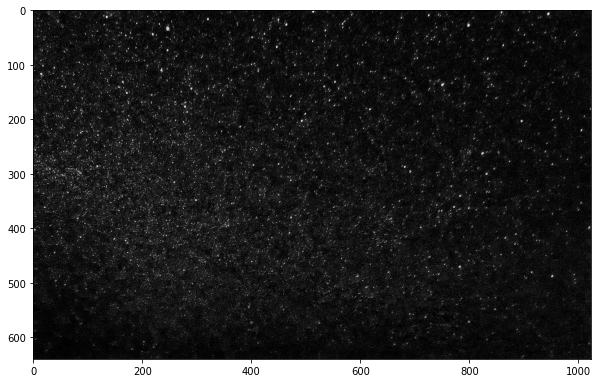

In [128]:
plt.figure(figsize=(10, 10))
imageO_2 = stretch(imageO)
plt.imshow(imageO_2,"gray")

##### Task3: max-filtered of Cells.png : image C (with N = 3, 5 ,7, 9)

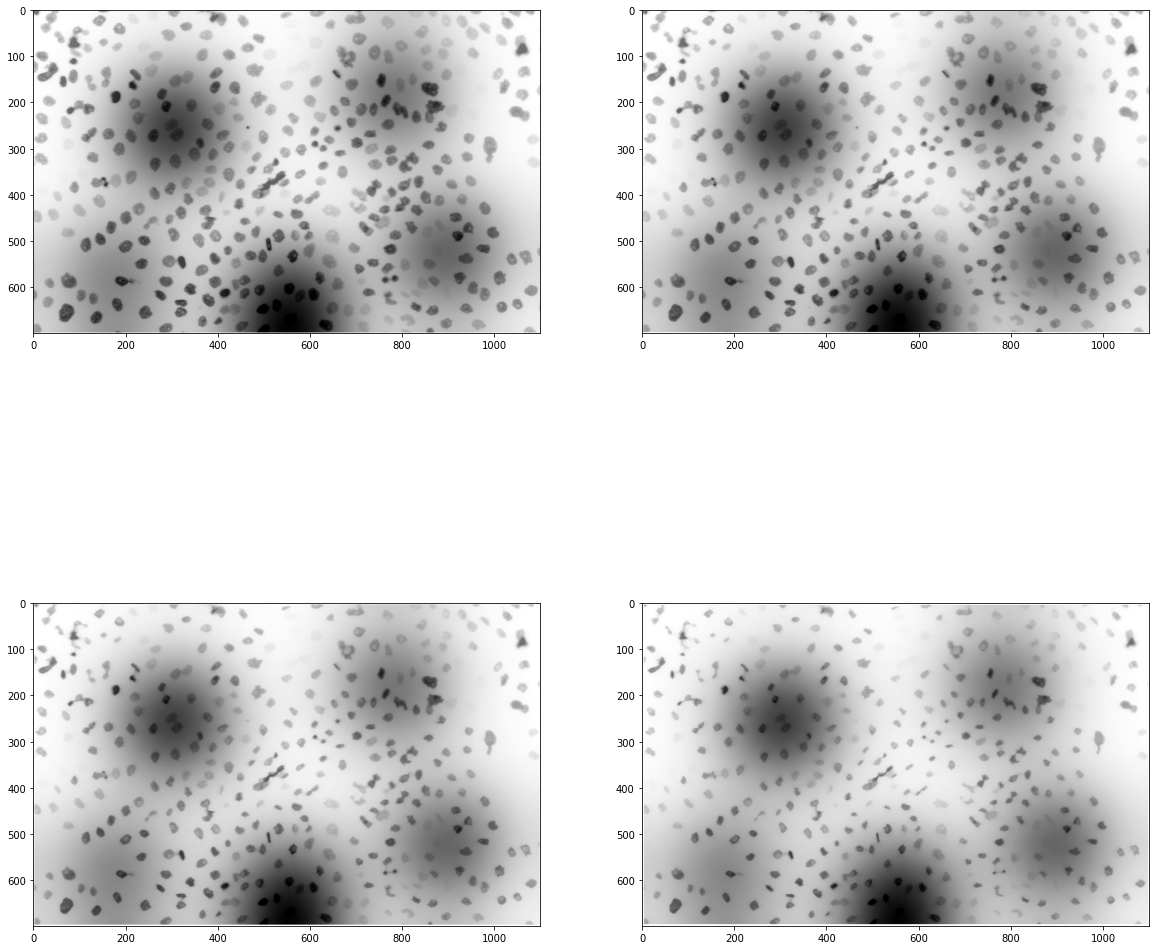

In [129]:
plt.figure(figsize=(20, 20))
for i in range(1,5):
    N_C = 2 * i + 1
    imageC = max_filter(image_C, N_C, 255)
    plt.subplot(2, 2, i)
    plt.imshow(imageC,"gray")

##### Task3: max-filtered of Cells.png : image C (with N = 11, 13, 15, 17)

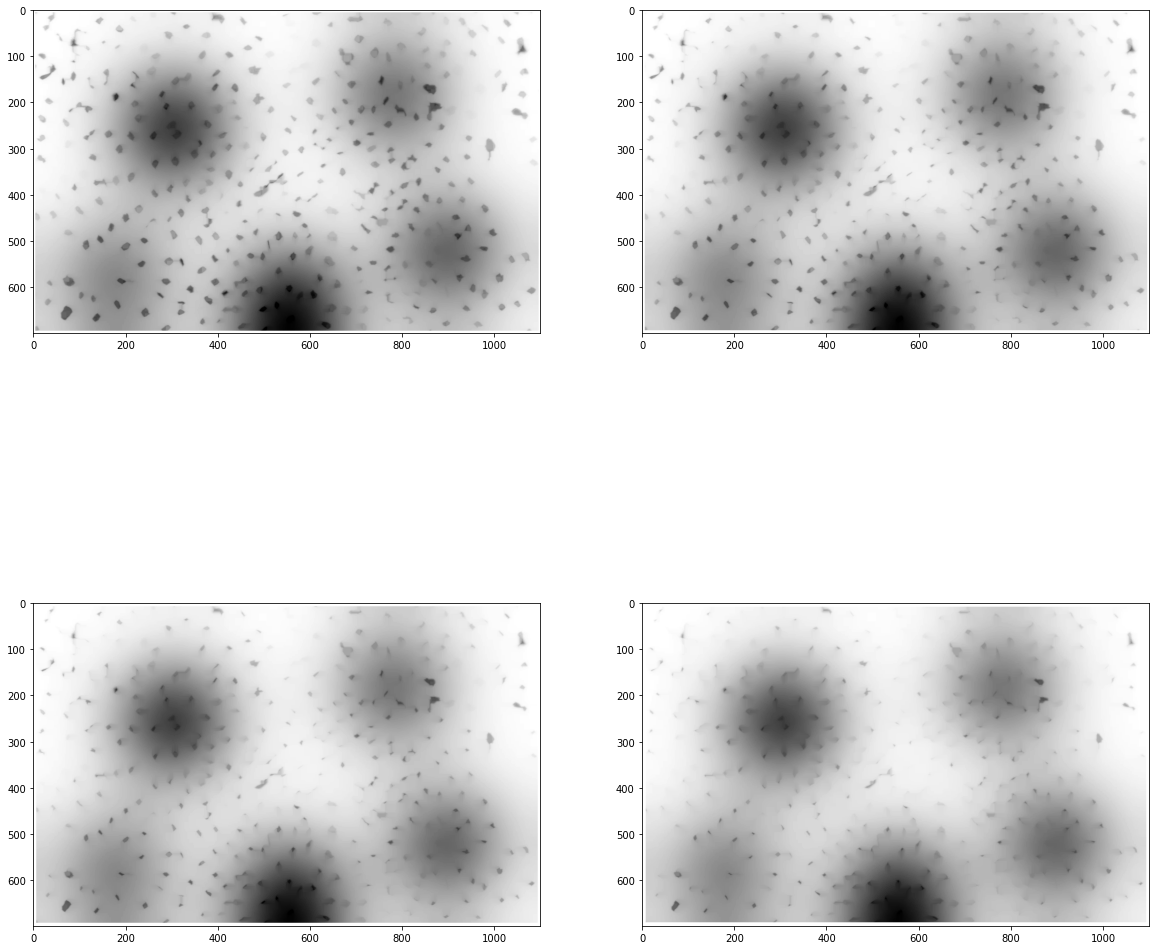

In [130]:
plt.figure(figsize=(20, 20))
pos = 1
for i in range(5,9):
    N_C = 2 * i + 1
    imageC = max_filter(image_C, N_C, 255)
    plt.subplot(2, 2, pos)
    pos += 1
    plt.imshow(imageC,"gray")

##### Task3: max-filtered of Cells.png : image C (with N = 19, 21, 23, 25)

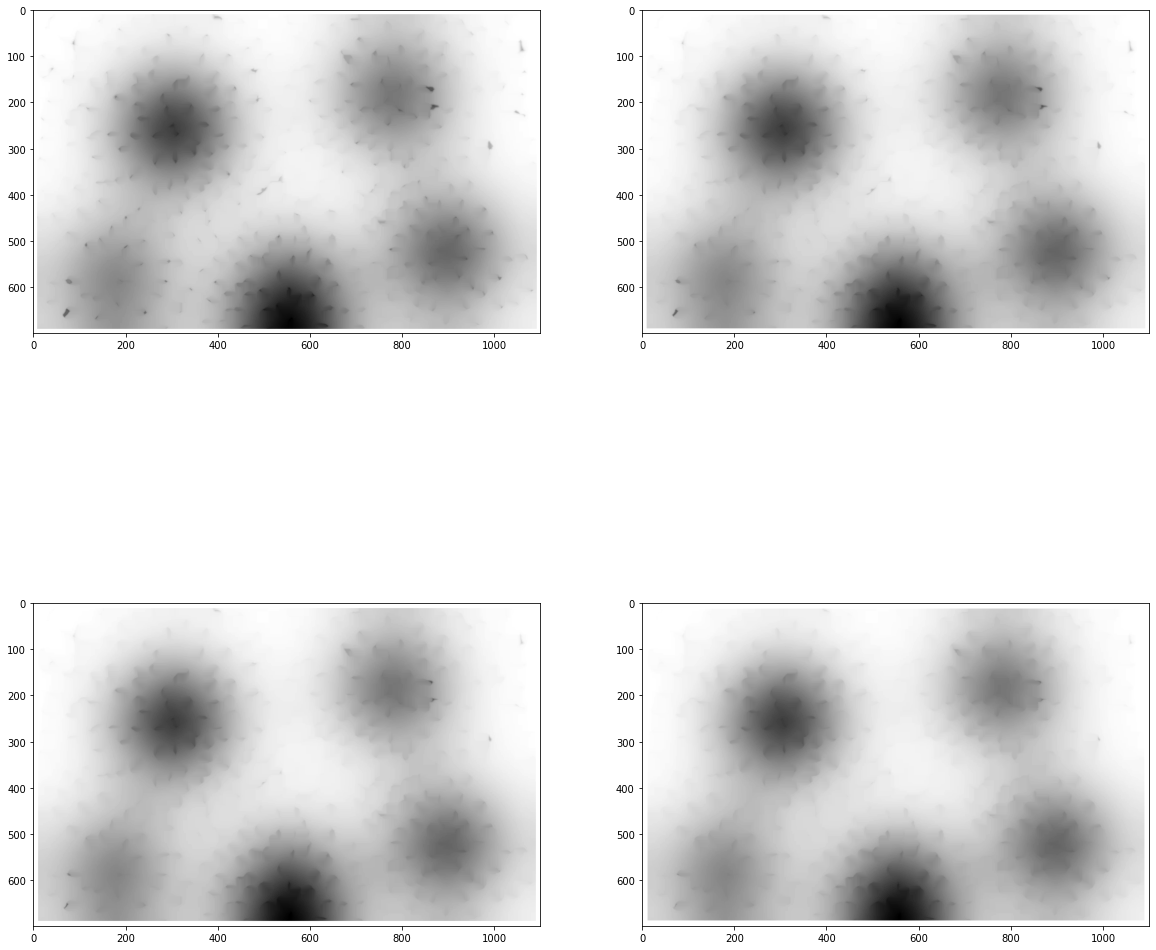

In [131]:
plt.figure(figsize=(20, 20))
pos = 1
for i in range(9,13):
    N_C = 2 * i + 1
    imageC = max_filter(image_C, N_C, 255)
    plt.subplot(2, 2, pos)
    pos += 1
    plt.imshow(imageC,"gray")

##### Task3: max-filtered of Cells.png : image C (with N = 27, 29, 31, 33) (Max N is 33)

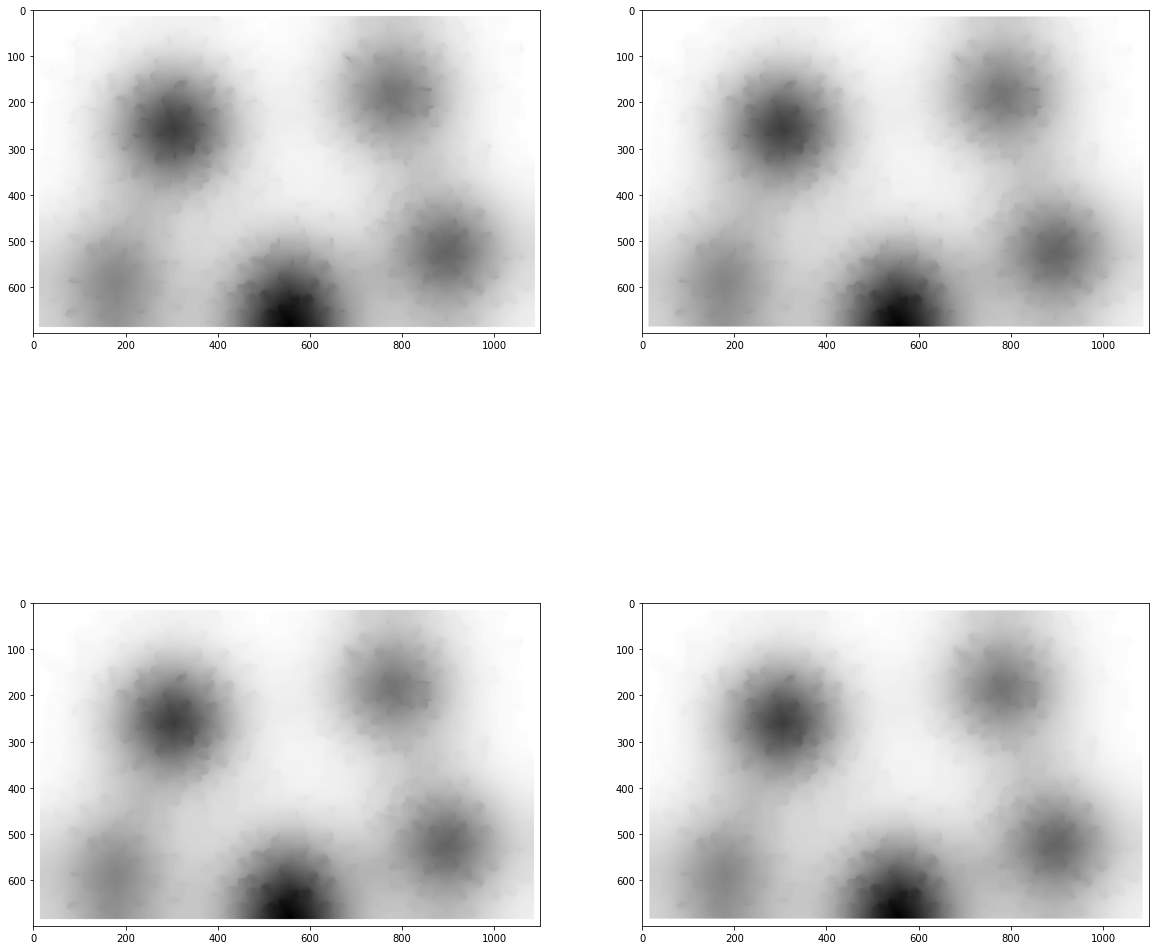

In [132]:
plt.figure(figsize=(20, 20))
pos = 1
for i in range(13,17):
    N_C = 2 * i + 1
    imageC = max_filter(image_C, N_C, 255)
    plt.subplot(2, 2, pos)
    pos += 1
    plt.imshow(imageC,"gray")

##### Task3: Final processed image of Cells.png : image C (with N = 25) 

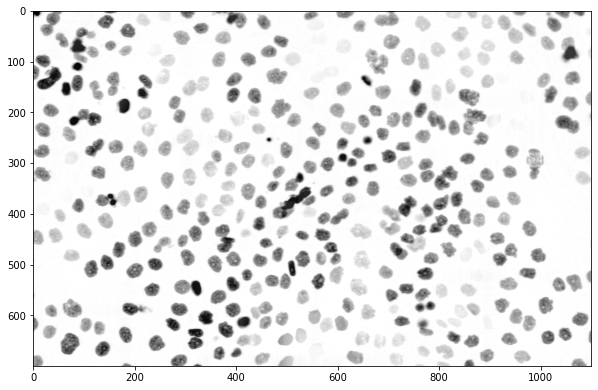

In [133]:
plt.figure(figsize=(10, 10))
imageOC25 = img_process(image_C, 1, 25, 255)
plt.imshow(imageOC25,"gray")

##### Task3: all process of Cells.png : image C (with N = 27) 

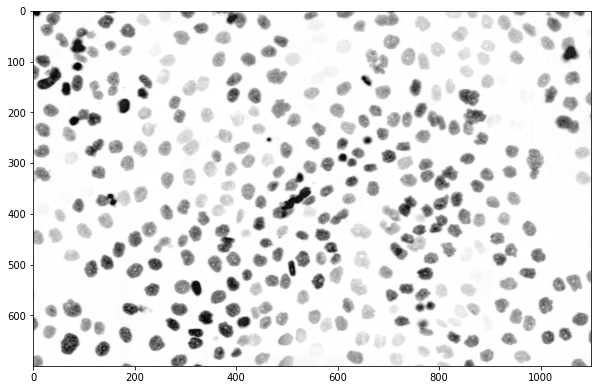

In [134]:
plt.figure(figsize=(10, 10))
imageOC27 = img_process(image_C, 1, 27, 255)
plt.imshow(imageOC27,"gray")

##### Task3: all process of Cells.png : image C (with N = 29) 

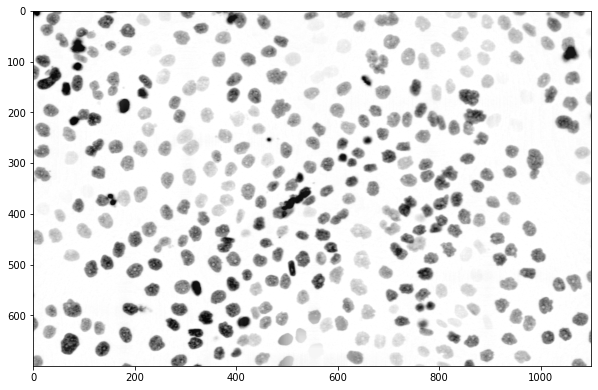

In [135]:
plt.figure(figsize=(10, 10))
imageOC29 = img_process(image_C, 1, 29, 255)
plt.imshow(imageOC29,"gray")

##### Task3: Contrast stretch: image C (with N = 9)

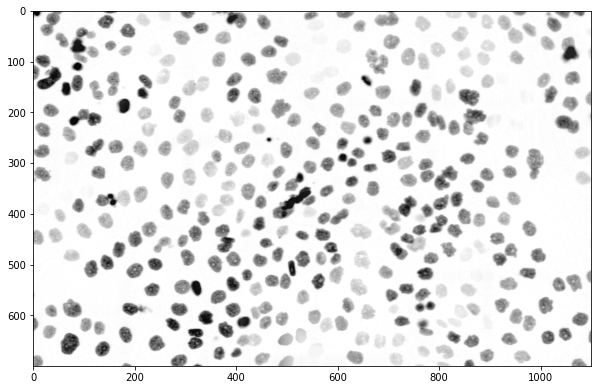

In [137]:
plt.figure(figsize=(10, 10))
imageOC2 = stretch(imageOC27)
plt.imshow(imageOC2,"gray")

#### Save the output image

In [138]:
cv2.imwrite("output_M.png", imageO)
cv2.imwrite("output_C.png", imageOC27)


True

In [139]:
cv2.imwrite("image_A.png", imageA9)
cv2.imwrite("image_B.png", imageB)

True